In [ ]:
import pandas as pd
import numpy as np

In [1]:
all_data = pd.read_csv('/content/drive/MyDrive/Courses /Старт ИИ/13.Пайплайн машинного обучения/forest_dataset.csv')
all_data

NameError: ignored

In [ ]:
all_data.shape

(10000, 55)

In [ ]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
    feature_matrix, labels, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(C=1)

clf.fit(train_feature_matrix, train_labels)

y_pred = clf.predict(test_feature_matrix)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, y_pred)

0.6075

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = LogisticRegression(solver='saga')

param_grid = {
    'C': np.arange(1, 5),
    'penalty': ['l1', 'l2'],
}

search = GridSearchCV(clf, param_grid, n_jobs=-1, cv=5, refit=True, scoring='accuracy')

search.fit(feature_matrix, labels)

print(search.best_params_)

{'C': 1, 'penalty': 'l2'}


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
accuracy_score(labels, search.best_estimator_.predict(feature_matrix))

0.6417

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf = KNeighborsClassifier()
clf.fit(train_feature_matrix, train_labels)
yy_pred = clf.predict(test_feature_matrix)

In [ ]:
accuracy_score(test_labels, yy_pred)

0.7365

In [ ]:
from sklearn.model_selection import GridSearchCV


params = {
    'n_neighbors': np.arange(1, 11),
    'metric': ['manhattan', 'euclidean'],
    'weights': ['uniform', 'distance']
}

clf_grid = GridSearchCV(clf, params, cv=5, scoring='accuracy', n_jobs=-1)

clf_grid.fit(feature_matrix, labels)

clf_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

In [ ]:
optimal_clf = KNeighborsClassifier(n_neighbors=4)

optimal_clf.fit(train_feature_matrix, train_labels)

pred_prob = optimal_clf.predict_proba(test_feature_matrix)
pred_prob

array([[0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.75, 0.25, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.5 , 0.5 , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.5 , 0.  , 0.  , ..., 0.  , 0.  , 0.5 ]])

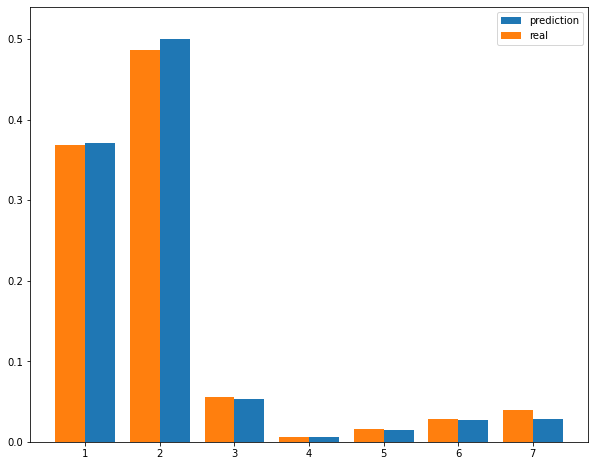

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

unique, freq = np.unique(test_labels, return_counts=True)
freq = list(map(lambda x: x / len(test_labels), freq))

pred_freq = pred_prob.mean(axis=0)
plt.figure(figsize=(10, 8))
plt.bar(range(1, 8), pred_freq, width=0.4, align='edge', label='prediction')
plt.bar(range(1, 8), freq, width=-0.4, align='edge', label='real')
plt.ylim(0, 0.54)
plt.legend()
plt.show()

In [ ]:
pred_freq

array([0.3705  , 0.500125, 0.05325 , 0.005625, 0.014875, 0.02725 ,
       0.028375])